KHAI BÁO THƯ VIỆN PANDAS

In [1]:
import pandas as pd
import numpy as np


KHAI BÁO DỮ LIỆU

In [2]:
data = pd.read_csv('diabetes.csv')


IN THỬ DỮ LIỆU

In [3]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


ĐẾM SỐ HÀNG VÀ SỐ CỘT CỦA DỮ LIỆU

In [4]:
data.shape

(768, 9)

describe data

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


ĐẾM SỐ CỘT NULL

In [6]:
data.isna().sum()
print("number of rows with glucose value 0 is: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows with missing skin thikness 0 is: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows with Insulin 0 is: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(data.loc[data['Age'] == 0])))

number of rows with glucose value 0 is: 5
number of rows with missing BloodPressure 0 is: 35
number of rows with missing skin thikness 0 is: 227
number of rows with Insulin 0 is: 374
number of rows with BMI 0 is: 11
number of rows with DiabetesPedigreeFunction 0 is: 0
number of rows with age 0 is: 0


Xử lý giá trị NULL bằng cách thay thế null với giá trị trung bình
note:
most_frequent : xuất hiện nhiều nhất
mean, trung bình    

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=0)
imputer = imputer.fit(data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = imputer.transform(data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])



ghi dữ liệu ra file

In [8]:
data.to_csv("output.csv", index=False)  # Không lưu cột chỉ số (index)


check lại giá trị các cột

In [9]:
data.isna().sum()
print("number of rows with glucose value 0 is: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows with missing BloodPressure 0 is: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows with missing skin thikness 0 is: {0}".format(len(data.loc[data['SkinThickness'] == 0])))
print("number of rows with Insulin 0 is: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows with BMI 0 is: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows with DiabetesPedigreeFunction 0 is: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows with age 0 is: {0}".format(len(data.loc[data['Age'] == 0])))

number of rows with glucose value 0 is: 0
number of rows with missing BloodPressure 0 is: 0
number of rows with missing skin thikness 0 is: 0
number of rows with Insulin 0 is: 0
number of rows with BMI 0 is: 0
number of rows with DiabetesPedigreeFunction 0 is: 0
number of rows with age 0 is: 0


đếm số dữ liệu data bị bệnh và không bị bệnh

In [10]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

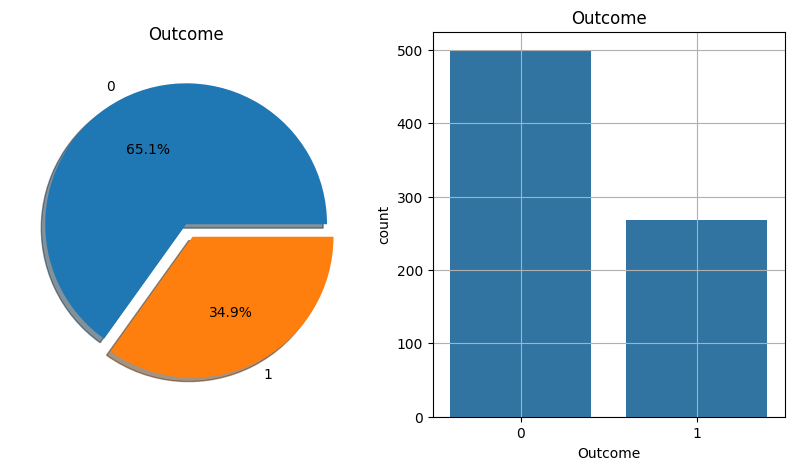

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

# outcome
f, ax = plt.subplots(1, 2, figsize=(10, 5))
data['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1], 
    autopct='%1.1f%%', 
    ax=ax[0], 
    shadow=True
)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot(x='Outcome', data=data, ax=ax[1])
ax[1].set_title('Outcome')
N, P = data['Outcome'].value_counts()



plt.grid()
plt.show()

CHIA TẬP DỮ LIỆU RA: 80% train 20% test

In [12]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='Outcome', axis=1) #tập giá trị
Y = data['Outcome'] # tập kết quả
x_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

Đánh giá mức độ tương quan của từng cột ảnh hưởng tới kết quả cuối cùng
Giá trị lớn hơn 0: Đặc trưng có sự phụ thuộc (đóng góp thông tin) vào biến mục tiêu. Giá trị càng lớn, đặc trưng càng quan trọng.
Giá trị bằng 0: Đặc trưng không có mối quan hệ với biến mục tiêu hoặc không đóng góp thông tin.

In [13]:
# URL: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
# Estimate mutual information for a discrete target variable.
# Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. 
# It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(x_train, y_train, random_state = 0)
mutual_info

array([0.01555395, 0.11358017, 0.02420075, 0.00523363, 0.0200378 ,
       0.07666446, 0.        , 0.04601336])

In [14]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending = False)

Glucose                     0.113580
BMI                         0.076664
Age                         0.046013
BloodPressure               0.024201
Insulin                     0.020038
Pregnancies                 0.015554
SkinThickness               0.005234
DiabetesPedigreeFunction    0.000000
dtype: float64

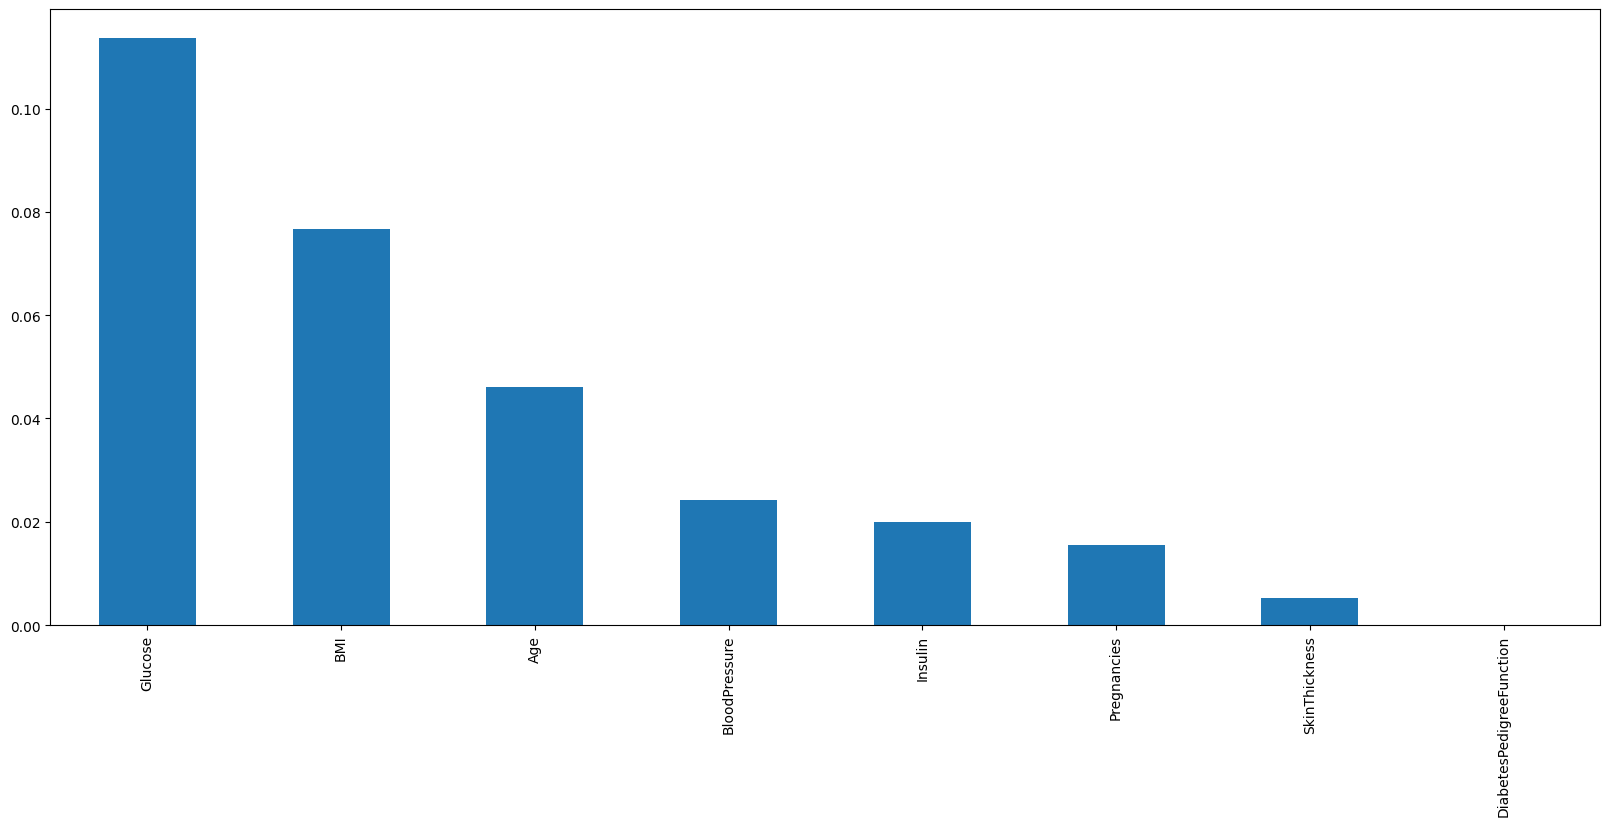

In [15]:
plt.figure(figsize = (20, 8))
mutual_info.sort_values(ascending = False).plot.bar();

Vì yếu tố ảnh hưởng của lịch sử gia đình ảnh hưởng ít tới kết quả => loại bỏ để tối ưu thuật toán

In [16]:
data.drop(columns='DiabetesPedigreeFunction',axis=1, inplace=True)
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148.0,72.0,35.0,105.0,33.6,50,1
1,1,85.0,66.0,29.0,105.0,26.6,31,0
2,8,183.0,64.0,32.0,105.0,23.3,32,1
3,1,89.0,66.0,23.0,94.0,28.1,21,0
4,0,137.0,40.0,35.0,168.0,43.1,33,1


đếm số 0/1 của tập smote là tập train của bài toán

In [17]:
y_train.value_counts()


Outcome
0    393
1    221
Name: count, dtype: int64

cân bằng dữ liệu với SMOTE


In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE( sampling_strategy='minority',random_state=0)
X_smote, y_smote = sm.fit_resample(x_train, y_train)

np.bincount(y_smote)

array([393, 393])

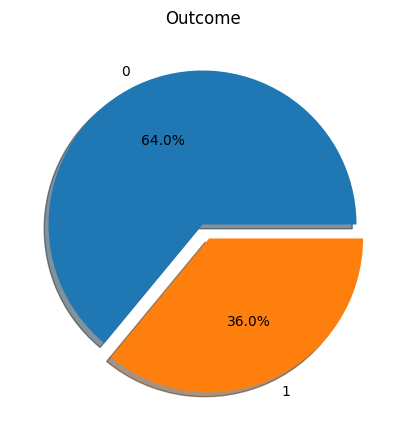

In [19]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))  # Chỉ một biểu đồ
y_train.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax, shadow=True)
ax.set_title('Outcome')
ax.set_ylabel('')
plt.show()


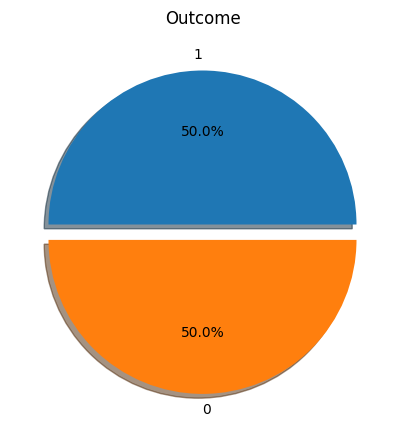

In [20]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))  # Chỉ một biểu đồ
y_smote.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax, shadow=True)
ax.set_title('Outcome')
ax.set_ylabel('')
plt.show()


# **Decision tree**

Tạo ra cây với các tầng khác nhau, sau đó huấn luyện mô hình tại từng tầng và kiểm tra độ chính xác tại mỗi tầng
Phân tích ảnh hưởng của tham số max_depth đến độ chính xác của mô hình trên tập huấn luyện và kiểm tra.

Depth =  2 , Training Accuracy =  0.7493638676844784 , Test Accuracy =  0.7402597402597403 , Diff =  0.9104127424738095  %
Depth =  3 , Training Accuracy =  0.7646310432569975 , Test Accuracy =  0.6883116883116883 , Diff =  7.631935494530917  %
Depth =  4 , Training Accuracy =  0.8040712468193384 , Test Accuracy =  0.7337662337662337 , Diff =  7.030501305310466  %
Depth =  5 , Training Accuracy =  0.8269720101781171 , Test Accuracy =  0.7337662337662337 , Diff =  9.320577641188333  %
Depth =  6 , Training Accuracy =  0.8447837150127226 , Test Accuracy =  0.7467532467532467 , Diff =  9.803046825947593  %
Depth =  7 , Training Accuracy =  0.8753180661577609 , Test Accuracy =  0.7272727272727273 , Diff =  14.804533888503357  %
Depth =  8 , Training Accuracy =  0.8931297709923665 , Test Accuracy =  0.7207792207792207 , Diff =  17.235055021314572  %
Depth =  9 , Training Accuracy =  0.9185750636132316 , Test Accuracy =  0.7402597402597403 , Diff =  17.83153233534913  %
Depth =  10 , Trainin

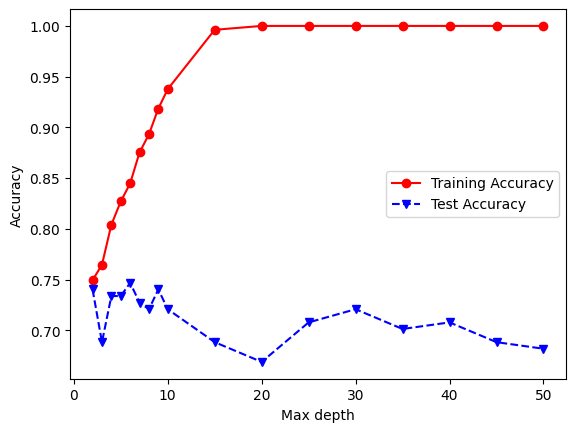

In [21]:
from sklearn import tree
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_smote, y_smote)
    y_predTrain = clf.predict(X_smote)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_smote, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

Tạo một cây quyết định với độ sâu tối đa là 2 và huấn luyện nó bằng dữ liệu đã được cung cấp 

In [22]:
from sklearn.tree import DecisionTreeClassifier

# create a model 
dt = DecisionTreeClassifier(max_depth = 2, random_state=0)
dt.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=2, random_state=0)

Kiểm tra độ chính xác training và test của thuật toán.

In [23]:
from sklearn.metrics import classification_report

# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_smote, y_smote))

# Accuracy on Test
print("Testing Accuracy is: ", dt.score(X_test, y_test))
X_test_prediction  = dt.predict(X_test) 

print(classification_report(y_test, X_test_prediction))

Training Accuracy is:  0.7493638676844784
Testing Accuracy is:  0.7402597402597403
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       107
           1       0.57      0.57      0.57        47

    accuracy                           0.74       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.74      0.74      0.74       154



Kiểm tra chéo mô hình

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(dt,X,Y,cv=skfold)

tính toán và hiển thị độ chính xác trung bình (mean accuracy) và độ lệch chuẩn (standard deviation) của mô hình dựa trên kết quả kiểm tra chéo 

In [25]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7357015533486122 +/- 0.012208077742788486


# **Bagging Decision tree**

In [26]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,
                           max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,
                           oob_score=True)
bagging.fit(X_smote,y_smote)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [27]:
from sklearn.metrics import confusion_matrix

y_pred=bagging.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test,y_pred))

[[84 23]
 [ 6 41]]
Accuracy Score 0.8116883116883117
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       107
           1       0.64      0.87      0.74        47

    accuracy                           0.81       154
   macro avg       0.79      0.83      0.80       154
weighted avg       0.84      0.81      0.82       154



In [28]:
skfold = StratifiedKFold(n_splits=5)

cv_score = cross_val_score(bagging,X,Y,cv=skfold)

In [29]:
cv_score

array([0.74675325, 0.71428571, 0.75324675, 0.82352941, 0.73856209])

In [30]:
results=cv_score
print("Results = ", np.mean(results),"+/-",np.std(results))

Results =  0.7552754435107376 +/- 0.03659191616037781
